In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#!pip install --upgrade pandas

data_train = pd.read_csv('dataset/train.csv', encoding='utf-8')
data_test = pd.read_csv('dataset/test.csv', encoding='utf-8')
#data_train['tweet'] = data_train['tweet'].encode('ascii', 'ignore').decode('ascii')

In [2]:
#Data Inspection

In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
id       31962 non-null int64
label    31962 non-null int64
tweet    31962 non-null object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


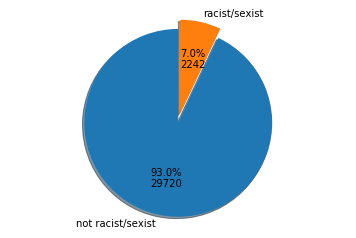

In [76]:
#data = data_train['label']
count_label = data_train['label'].value_counts()

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.1f}%\n{v:d}'.format(p=pct,v=val)
    return my_autopct

fig1, ax1 = plt.subplots()
ax1.pie(count_label, explode=(0, 0.1), labels=['not racist/sexist', 'racist/sexist'], 
        autopct=make_autopct(count_label),shadow=True, startangle=90)
ax1.axis('equal')
plt.savefig('proportion_pos_neg.png')
plt.show()

=>  [ 74 101  22  47 104  39]
->  [102 122  21  86  39 116]
(29720,) 274 11 84.32863391655451 29.56598639595588
(2242,) 152 12 90.18777876895629 27.36939585069528


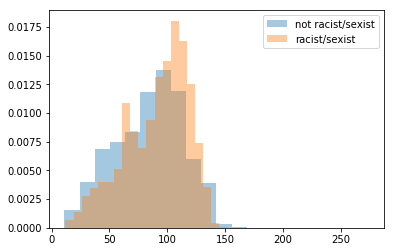

In [5]:
def num_of_words(data):
    count_word = data['tweet'].apply(lambda x : len(str(x)))#(lambda x : len(str(x).split(' ')))
    count_word = np.array(count_word)
    noracist = count_word[np.array(data['label']) == 0]
    racist = count_word[np.array(data['label']) == 1]
    print("=> ", racist[0:6])
    print("-> ", noracist[0:6])
    print(noracist.shape, np.max(noracist), np.min(noracist),  np.mean(noracist), np.std(noracist))
    print(racist.shape, np.max(racist), np.min(racist), np.mean(racist), np.std(racist))
    nbins_noracist = np.max(noracist) - np.min(noracist)
    nbins_racist = np.max(racist) - np.min(racist)
    fig, ax = plt.subplots()
    # the histogram of the data
    n, bins, patches = ax.hist(noracist, 20, alpha=0.4, label='not racist/sexist', density=True) #nbins_noracist
    nr, binsr, patchesr = ax.hist(racist, 20, alpha=0.4, label='racist/sexist', density=True) #nbins_racist
    #plt.show()
    plt.legend()
    plt.show()

num_of_words(data_train)

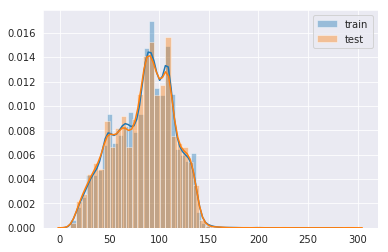

In [81]:
#!pip3 install seaborn
#length of tweets on train and test 
import seaborn as sns
len_tweet_train = data_train['tweet'].str.len()#.apply(lambda x : len(str(x)))
len_tweet_train = np.array(len_tweet_train)

len_tweet_test = data_test['tweet'].str.len()#.apply(lambda x : len(str(x)))#(lambda x : len(str(x).split(' ')))
len_tweet_test = np.array(len_tweet_test)

sns.set_style('darkgrid')
sns.distplot(len_tweet_train)
sns.distplot(len_tweet_test)
plt.legend(labels=['train', 'test'])
plt.savefig('length_tweets_trainvstest.png')

In [82]:
#length of tweets on train (racist/sexist or not)
len_tweets_train = data_train['tweet'].apply(lambda x : len(str(x)))#.apply(lambda x : len(str(x).split(' ')))
noracist = len_tweets_train[np.array(data_train['label']) == 0]
racist = len_tweets_train[np.array(data_train['label']) == 1]
sns.distplot(noracist, label='noracist')
sns.distplot(racist, label='racist')
plt.legend(labels=['not racist/sexist', 'racist/sexist'])
plt.savefig('length_tweets_negvspos.png')
print('noracist', noracist.shape, np.max(noracist), np.min(noracist),  np.mean(noracist), np.std(noracist))
print('racist', racist.shape, np.max(racist), np.min(racist), np.mean(racist), np.std(racist))

noracist (29720,) 274 11 84.32863391655451 29.56598639595588
racist (2242,) 152 12 90.18777876895629 27.36939585069528


noracist (29720,) 43 3 16.05107671601615 5.43810290215849
racist (2242,) 33 4 16.009812667261375 4.798424888444615


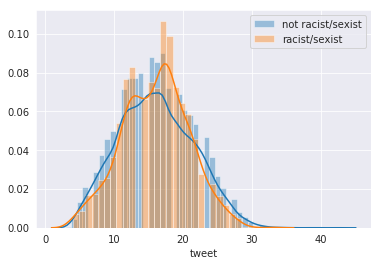

In [83]:
#length words on train (racist/sexist or not)
len_word_train = data_train['tweet'].apply(lambda x : len(str(x).split(' ')))
noracist = len_word_train[np.array(data_train['label']) == 0]
racist = len_word_train[np.array(data_train['label']) == 1]
sns.distplot(noracist, label='noracist')
sns.distplot(racist, label='racist')
plt.legend(labels=['not racist/sexist', 'racist/sexist'])
plt.savefig('length_words_negvspos.png')
print('noracist', noracist.shape, np.max(noracist), np.min(noracist),  np.mean(noracist), np.std(noracist))
print('racist', racist.shape, np.max(racist), np.min(racist), np.mean(racist), np.std(racist))

In [ ]:
#!pip3 install nltk
#!pip3 install textblob
#import emoji
import re
import string
import nltk
#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import Word
from nltk.tokenize import TweetTokenizer

def clean_text(text):
    #stemmer = nltk.SnowballStemmer("english")
    stopword=set(stopwords.words('english'))
    text = str(text).lower()
    #text = re.sub('â', '', text)
    #text = re.sub('ð', '', text)
    text = re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])', '', text)
    text = re.sub('\d+','',text)
    text = re.sub(r'[^\w\s]','',text)
    #text = re.sub('@user', '', text)
    #text = re.sub("^\'", '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = text.encode('ascii', 'ignore').decode('ascii')
    '''
    text = re.sub('[^\x00-\x7f]', '', text)
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    '''
    
    #text = [word for word in text.split(' ') if word not in stopword]
    #text = " ".join(text)
    #text = [word for word in text.split(' ') if word not in string.punctuation]
    #text = " ".join(text)
    
    #text = [stemmer.stem(word) for word in text.split(' ')]
    #text=" ".join(text)
    return text

def process_tweet(tweet, stemming_word = False):
    """Process tweet function.
    Input:
        tweet: a string containing a tweet
    Output:
        tweets_clean: a list of words containing the processed tweet
    """
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and #remove stopwords
                word not in string.punctuation): #remove punctuation
            if stemming_word:
                stem_word = stemmer.stem(word)  # stemming word
                tweets_clean.append(stem_word)
            else:
                tweets_clean.append(word)

    return tweets_clean

from nltk.tokenize import TweetTokenizer

def tokenizer(tweet):
    #Tokenization refers to dividing the text into a sequence of words or sentences.
    tknzr = TweetTokenizer(strip_handles=True)
    tweet_token = tweet.apply(lambda x: tknzr.tokenize(x))
    return tweet_token

def stop_words_punctuations(tweet):
    stop = stopwords.words("english")
    #tweet_wostop = tweet.apply(lambda x: [i.lower() for i in x if i not in stop])
    #tweet_wostop_punct = tweet_wostop.apply(lambda x: [i.lower() for i in x 
    #                        if i not in string.punctuation and len(i) > 3])
    tweet_wostop_punct = tweet.apply(lambda x: [i.lower() for i in x if i not in stop
                and i not in string.punctuation and len(i) > 3])
    return tweet_wostop_punct

def stemnlemm(tweet):
    #Stemming refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach.
    #Lemmatization is the process of converting a word to its base form.
    st = PorterStemmer()
    tweet_stemn = tweet.apply(lambda x: [Word(st.stem(i)).lemmatize() for i in x])
    return tweet_stemn

def preprocessing_tweets(tweet, stemming_word = False):
    from textblob import Word
    tweet = tweet.apply(lambda x: clean_text(x))
    tweet = tokenizer(tweet)
    tweet = stop_words_punctuations(tweet)
    if stemming_word:
        tweet = stemnlemm(tweet)
    return tweet
'''
tweets_wostop_punt = data_train['tweet'].apply(lambda x: clean_text(x))
print('----clean_text----\n', tweets_wostop_punt[0:5])
tweets_wostop_punt = tokenizer(tweets_wostop_punt)
print('----tokenizer----\n', tweets_wostop_punt[0:5])
tweets_wostop_punt = stop_words_punctuations(tweets_wostop_punt)
print('----stop_words_punctuations----\n', tweets_wostop_punt[0:5])
'''    
preproc_tweets = preprocessing_tweets(data_train['tweet'])

wostop_punt_noracist = preproc_tweets[np.array(data_train['label']) == 0].tolist()
wostop_punt_racist = preproc_tweets[np.array(data_train['label']) == 1].tolist()
print(wostop_punt_noracist[0:5])
#['father dysfunctional selfish drags kids dysfunction run', 'thanks lyft credit cant use cause dont offer wheelchair vans pdx disapointed getthanked', 'bihday majesty', 'model love u take u time ur', 'factsguide society motivation']
print('...............')
print(wostop_punt_racist[0:5])
print('...............')


In [10]:
#!pip3 install wordcloud
#tweets_wostop_punt = data_train['tweet'].apply(lambda x: clean_text(x))
tweets_wostop_punt = preprocessing_tweets(data_train['tweet'])
wostop_punt_noracist = tweets_wostop_punt[np.array(data_train['label']) == 0].tolist()
wostop_punt_racist = tweets_wostop_punt[np.array(data_train['label']) == 1].tolist()
#sentences=data_train['tweet'][data_train['label'] == 0].tolist()
wostop_punt_racist = ''.join([str(i).replace("'","") for i in wostop_punt_racist])
wostop_punt_noracist = ''.join([str(i).replace("'","") for i in wostop_punt_noracist])

from wordcloud import WordCloud
plt.figure()
plt.figure(figsize=(10,10))
plt.imshow(WordCloud().generate(wostop_punt_racist), interpolation='bilinear')#(' '.join([str(i) for i in wostop_punt_racist])))#(''.join(wostop_punt_racist)))

plt.figure()
plt.figure(figsize=(10,10))
plt.imshow(WordCloud().generate(wostop_punt_noracist), interpolation='bilinear')#(''.join(wostop_punt_noracist)))

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

[51, 79, 14, 20]
[50, 84, 13, 22]
noracist (29720,) 120 0 49.10178331090175 21.41676987346768
racist (2242,) 119 0 54.40321141837645 20.270423087124705


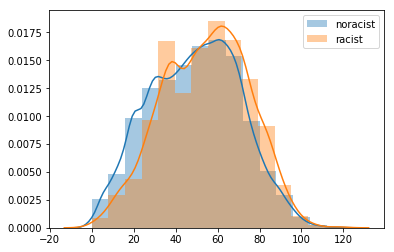

In [7]:
#!pip3 install seaborn
import seaborn as sns
#stopwords_english = stopwords.words('english')
#tweets_wostop = data_train['tweet'].apply(lambda x: len([x for x in x.split() if x not in stopwords_english or x not in string.punctuation]))
#tweets_wostop = data_train['tweet'].apply(lambda x: np.sum([len(x) for x in x.split() if x not in stopwords_english or x not in string.punctuation]))
#tweets_wostop = data_train['tweet'].apply(lambda x: len(process_tweet(str(x))))#np.sum([len(process_tweet(x)) for x in x.split()]))
#tweets_wostop = data_train['tweet'].apply(lambda x: clean_text(x))#np.sum([len(process_tweet(x)) for x in x.split()]))
tweets_wostop_punt = preprocessing_tweets(data_train['tweet'])
tweets_wostop2 = []
wostop_noracist = []
wostop_racist = []
for proc_tweets, lb in zip(tweets_wostop_punt, data_train['label'].tolist()):
    #s = [len(x) for x in proc_tweets]
    #tweets_wostop2.append(np.sum(s))
    l = ' '.join([str(i).replace("'", "") for i in proc_tweets])
    #assert(False), l#proc_tweets
    if lb == 0:
        #wostop_noracist.append(np.sum(s)) #(len(s))#
        wostop_noracist.append(len(l))
    else:
        #wostop_racist.append(np.sum(s)) #(len(s))
        wostop_racist.append(len(l))
#tweets_wostop2 = sum([len(x) for x in tweets_wostop])
print(wostop_noracist[0:4])
print(wostop_racist[0:4])
#tweets_wostop = tweets_wostop2
#'''

#wostop_noracist = tweets_wostop[np.array(data_train['label']) == 0]
#wostop_racist = tweets_wostop[np.array(data_train['label']) == 1]

#fig, ax = plt.subplots()
plt.figure()
sns.distplot(wostop_noracist, bins=15, label='noracist')
sns.distplot(wostop_racist, bins=15, label='racist')
print('noracist', np.array(wostop_noracist).shape, np.max(wostop_noracist), np.min(wostop_noracist),  np.mean(wostop_noracist), np.std(wostop_noracist))
print('racist', np.array(wostop_racist).shape, np.max(wostop_racist), np.min(wostop_racist), np.mean(wostop_racist), np.std(wostop_racist))
plt.legend()
plt.show()
#'''

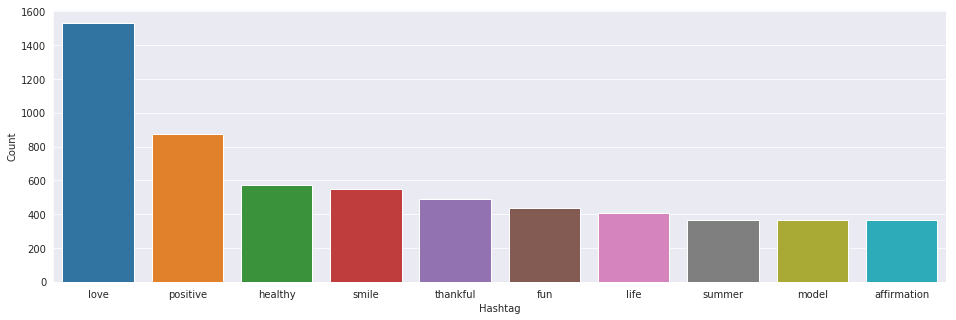

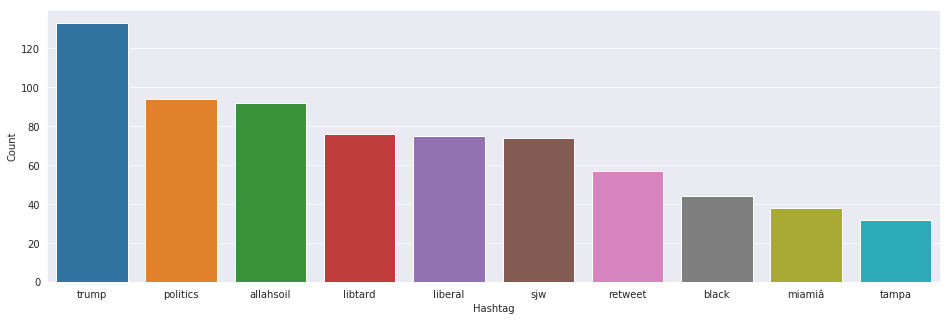

In [12]:
# Understanding the impact of Hashtags on tweets sentiment

def hashtag_extract(x):
    # function to collect hashtags 
    hashtags = []
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags

# extracting hashtags from non racist tweets
HT_regular = hashtag_extract(data_train['tweet'][data_train['label'] == 0])
HT_regular = sum(HT_regular,[])

# extracting hashtags from racist tweets
HT_negative = hashtag_extract(data_train['tweet'][data_train['label'] == 1])#hashtag_extract(wostop_punt_racist)
HT_negative = sum(HT_negative,[])

#Non racist/sexist Comments
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
d = d.nlargest(columns="Count", n = 10)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

#Racist/Sexist Comments
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
e = e.nlargest(columns="Count", n = 10)
e = e.nlargest(columns="Count", n = 10)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [4]:
#Bag of Words (BoW) refers to the representation of text which describes the presence of words within the text data.
#The intuition behind this is that two similar text fields will contain similar kind of words, 
#and will therefore have a similar bag of words. Further, that from the text alone we can learn something about 
#the meaning of the document.
#For implementation, sklearn provides a separate function for it as shown below:
    
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(max_features=1500, analyzer='word', lowercase=False) 

X_processed = preprocessing_tweets(data_train['tweet'], stemming_word=True)
print(X_processed[0:3])
print('-------------------')
X_processed = [' '.join(i) for i in X_processed]
#X_processed = [''.join(str(i).replace("'","")) for i in X_processed]
print(X_processed[0:3])
vect = CountVectorizer(stop_words = 'english', strip_accents = 'ascii')
X_train = vect.fit_transform(X_processed)
Y_train = np.array(data_train['label'].tolist())
print('X_train: ', X_train.toarray().shape, '\nY_train: ', Y_train)

0     [father, dysfunct, selfish, drag, kid, dysfunct]
1    [thank, lyft, credit, cant, caus, dont, offer,...
2                                    [bihday, majesti]
Name: tweet, dtype: object
-------------------
['father dysfunct selfish drag kid dysfunct', 'thank lyft credit cant caus dont offer wheelchair van disapoint getthank', 'bihday majesti']
X_train:  (31962, 31499) 
Y_train:  [0 0 0 ... 0 1 0]


In [5]:
#!pip3 install sklearn
#!pip3 install -U scikit-learn==0.24.0
#!pip3 install -U scikit-learn
#!pip install --upgrade pip3
#!pip3 uninstall -y scikit-learn
#!pip3 install scikit-learn==0.24.0
#!pip3 install scikit-learn==0.18.2 
#!pip3 install scikit-learn==0.22.1
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
#!pip3 install imbalanced-learn
#!pip3 install -U imbalanced-learn
#!pip3 install -U imbalanced-learn
#print('The scikit-learn version is {}.'.format(sklearn.__version__))
#!pip3 install -U imbalanced-learn
#!pip3 install imbalanced-learn

#!pip3 install imblearn

x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3)
print('---x_train---\n', x_train.shape, y_train.shape)
print('---y_train---\n', x_test.shape, y_test.shape)


'''from imblearn.over_sampling import SMOTE
#from imblearn import under_sampling, over_sampling
#SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, based on those that already exist. 
sm = SMOTE(random_state=12, sampling_strategy = 0.2, n_jobs=20)
x_res, y_res = sm.fit_sample(x_train, y_train)
print('---oversampling---\n', x_res.shape, y_res.shape)
#x_res_train, x_res_test, y_res_train, y_res_test = train_test_split(x_res, y_res, test_size=0.2)
#print('---x_res_train---\n', x_res_train.shape, y_res_train.shape)
#print('---x_res_test---\n', x_res_test.shape, y_res_test.shape)
'''

---x_train---
 (22373, 31499) (22373,)
---y_train---
 (9589, 31499) (9589,)


"from imblearn.over_sampling import SMOTE\n#from imblearn import under_sampling, over_sampling\n#SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, based on those that already exist. \nsm = SMOTE(random_state=12, sampling_strategy = 0.2, n_jobs=20)\nx_res, y_res = sm.fit_sample(x_train, y_train)\nprint('---oversampling---\n', x_res.shape, y_res.shape)\n#x_res_train, x_res_test, y_res_train, y_res_test = train_test_split(x_res, y_res, test_size=0.2)\n#print('---x_res_train---\n', x_res_train.shape, y_res_train.shape)\n#print('---x_res_test---\n', x_res_test.shape, y_res_test.shape)\n"

In [5]:
from sklearn.utils import resample
x_oversampled, y_oversampled = resample(x_train[y_train==1], y_train[y_train==1], replace=True,     # sample with replacement
                                 n_samples=int(y_train[y_train==0].shape[0]/3), random_state=123)
x_train_pos = x_train[y_train == 0]
x_train_pos = x_train_pos.toarray()
x_oversampled = x_oversampled.toarray()
x_balanced = np.concatenate((x_train_pos, x_oversampled), axis=0)

y_train_pos = y_train[y_train == 0]
#y_train_pos = y_train_pos.toarray()
#y_oversampled = y_oversampled.toarray()
y_balanced = np.concatenate((y_train_pos, y_oversampled), axis=0)

print('---balanced---\n', x_balanced.shape, y_balanced.shape)

---balanced---
 (27730, 31499) (27730,)


In [9]:
def metrics_func(y_test, pred):
    multinomial_cm = metrics.confusion_matrix(y_test, pred)
    print(multinomial_cm)
    multinomial_acc = metrics.accuracy_score(y_test, pred)
    print('acc:', multinomial_acc)
    #multinomial_bal_acc = metrics.balanced_accuracy_score(y_test, pred)
    #print('bal_acc: ',multinomial_bal_acc)
    multinomial_recall = metrics.recall_score(y_test, pred)
    print('rec:', multinomial_recall)
    multinomial_prec = metrics.precision_score(y_test, pred)
    print('prec:', multinomial_prec)
    #F-score or F-measure
    #Therefore, this score takes both false positives and false negatives into account.
    multinomial_f1 = metrics.f1_score(y_test, pred)#, average='weighted') 
    print('f1-measure:', multinomial_f1)

In [9]:
#Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
multinomial_model = MultinomialNB()
multinomial_model.fit(x_train,y_train)
pred = multinomial_model.predict(x_test)
metrics_func(y_test, pred)

[[8681  248]
 [ 303  357]]
acc: 0.9425383251642507
rec: 0.5409090909090909
prec: 0.5900826446280992
f1-measure: 0.5644268774703558


In [10]:
multinomial_model.fit(x_balanced,y_balanced)
pred = multinomial_model.predict(x_test)
metrics_func(y_test, pred)

[[8392  537]
 [ 137  523]]
acc: 0.9297111273334029
rec: 0.7924242424242425
prec: 0.49339622641509434
f1-measure: 0.6081395348837209


In [11]:
from sklearn import svm

svm_linear = svm.SVC(kernel='linear')
svm_linear.fit(x_train, y_train)
pred = svm_linear.predict(x_test)
metrics_func(y_test, pred)

[[8809  120]
 [ 255  405]]
acc: 0.960892689540098
rec: 0.6136363636363636
prec: 0.7714285714285715
f1-measure: 0.6835443037974683


In [ ]:
from sklearn import svm
weights = {0:1.0, 1:100.0}
svm_linear2 = svm.SVC(kernel='linear')#, class_weight=weights)
#svm_linear2.fit(x_res, y_res)
svm_linear2.fit(x_balanced, y_balanced)
pred = svm_linear2.predict(x_test)
metrics_func(y_test, pred)

In [20]:
from sklearn.linear_model import LogisticRegression
classifier_LR = LogisticRegression(n_jobs=10)
classifier_LR.fit(x_train, y_train)
pred = classifier_LR.predict(x_test)
metrics_func(y_test, pred)

classifier_LR2 = LogisticRegression(n_jobs=20)
#classifier_LR2.fit(x_res, y_res)
classifier_LR2.fit(x_balanced, y_balanced)
pred = classifier_LR2.predict(x_test)
metrics_func(y_test, pred)

/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 10.


[[8865   52]
 [ 358  314]]
acc: 0.9572426738971739
rec: 0.46726190476190477
prec: 0.8579234972677595
f1-measure: 0.6050096339113681


/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 20.


[[8753  164]
 [ 246  426]]
acc: 0.9572426738971739
rec: 0.6339285714285714
prec: 0.7220338983050848
f1-measure: 0.6751188589540412


In [16]:
from sklearn.neighbors import KNeighborsClassifier
KNNclassifier = KNeighborsClassifier(n_neighbors=1, n_jobs=10)#, metric='minkowski', p=2)
KNNclassifier.fit(x_train, y_train)
pred = KNNclassifier.predict(x_test)
metrics_func(y_test, pred)

[[8807  108]
 [ 418  256]]
acc: 0.9451454791949109
rec: 0.3798219584569733
prec: 0.7032967032967034
f1-measure: 0.49325626204238926


In [7]:
from sklearn.ensemble import RandomForestClassifier
RFclassifier = RandomForestClassifier(n_estimators = 400, random_state = 11, n_jobs=20)
RFclassifier.fit(x_train, y_train)
pred = RFclassifier.predict(x_test)
metrics_func(y_test, pred)

[[8846   76]
 [ 292  375]]
acc: 0.9616226926686828
rec: 0.5622188905547226
prec: 0.8314855875831486
f1-measure: 0.670840787119857


In [8]:
from sklearn.ensemble import RandomForestClassifier
RFclassifier2 = RandomForestClassifier(n_estimators = 400, random_state = 11, n_jobs=20)
RFclassifier2.fit(x_balanced, y_balanced)
pred = RFclassifier2.predict(x_test)
metrics_func(y_test, pred)

[[8768  154]
 [ 241  426]]
acc: 0.9588069663155699
rec: 0.638680659670165
prec: 0.7344827586206897
f1-measure: 0.6832397754611066


In [23]:
from sklearn.ensemble import GradientBoostingClassifier
GBM_model = GradientBoostingClassifier(n_estimators = 400, random_state = 11)
GBM_model.fit(x_train, y_train)
pred = GBM_model.predict(x_test)
metrics_func(y_test, pred)

[[8892   37]
 [ 398  262]]
acc: 0.9546355198665137
rec: 0.396969696969697
prec: 0.8762541806020067
f1-measure: 0.5464025026068822


In [ ]:
GBM_model2 = GradientBoostingClassifier(n_estimators = 400, random_state = 11)
GBM_model2.fit(x_balanced, y_balanced)
pred = GBM_model2.predict(x_test)
metrics_func(y_test, pred)

In [30]:
#!pip3 install xgboost
from xgboost import XGBClassifier
XGB = XGBClassifier(learning_rate=0.1,
        max_depth=7,
        n_estimators=500,
        eval_metric='auc')
XGB.fit(x_train, y_train)
pred = XGB.predict(x_test)
metrics_func(y_test, pred)

[[8875   54]
 [ 349  311]]
acc: 0.9579726770257587
rec: 0.4712121212121212
prec: 0.852054794520548
f1-measure: 0.606829268292683


In [9]:
from sklearn.svm import SVC
SVCclassifier= SVC(kernel='rbf',random_state=0)
SVCclassifier.fit(x_train, y_train)
pred = SVCclassifier.predict(x_test)
metrics_func(y_test, pred)

[[8907   15]
 [ 404  263]]
acc: 0.9563040984461362
rec: 0.39430284857571213
prec: 0.9460431654676259
f1-measure: 0.5566137566137566


In [ ]:
SVCclassifier2= SVC(kernel='rbf',random_state=0)
SVCclassifier2.fit(x_balanced, y_balanced)
pred = SVCclassifier2.predict(x_test)
metrics_func(y_test, pred)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier()
DTclassifier.fit(x_train, y_train)
pred = DTclassifier.predict(x_test)
metrics_func(y_test, pred)

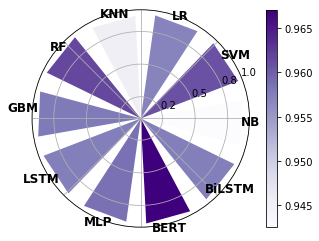

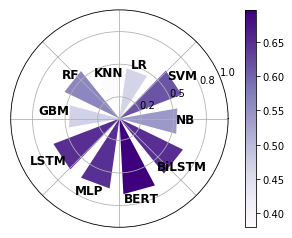

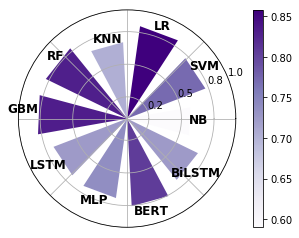

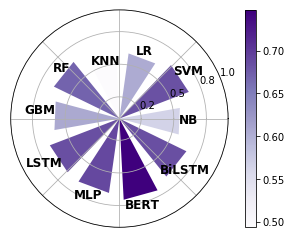

In [74]:
import itertools
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
import numpy as np

models_name =  ['NB', 'SVM', 'LR', 'KNN', 'RF', 'GBM', 'LSTM', 'MLP', 'BERT', 'BiLSTM']
mt_acc = np.array(
         [0.9425383251642507, 0.960892689540098, 0.9572426738971739, 0.9451454791949109, 
          0.9616226926686828, 0.9579726770257587, 0.9576598185420795, 0.9587026801543436, 
          0.9670490093847758, 0.9576598185420795])
mt_rec = np.array(
         [0.5409090909090909, 0.6136363636363636, 0.46726190476190477, 0.3798219584569733, 
          0.5622188905547226, 0.4712121212121212, 0.6505139500734214, 0.6490455212922174, 
          0.6964285714285714, 0.6505139500734214])

mt_prec = np.array(
         [0.5900826446280992, 0.7714285714285715, 0.8579234972677595, 0.7032967032967034,
          0.8314855875831486, 0.832054794520548, 0.7250409165302782, 0.7378964941569283,
          0.8068965517241379, 0.7250409165302782])

mt_f1 = np.array(
         [0.5644268774703558, 0.6835443037974683, 0.6050096339113681, 0.49325626204238926, 
          0.670840787119857, 0.606829268292683, 0.6857585139318886, 0.690625,
          0.7476038338658146, 0.6857585139318886])

def draw_fig(values, name):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='polar')
    angle = np.arange(-15, 360, 360/len(values))
    x = np.radians(angle)
    y = values #np.random.random(x.size)
    z = values #np.ones(y.size)#np.random.random(y.size)
    cmap = plt.get_cmap('Purples')
    coll = colored_bar(x, y, z, ax=ax, width=np.radians(25), cmap=cmap)
    fig.colorbar(coll)
    ax.set_yticks([0.2, 0.5, 0.8, 1.0])
    for i, (xx, vv) in enumerate(zip(x, values)):
        g = 0.0
        if i == 0: g = 0.07
        if i == 1: g = 0.07
        if i == 2: g = 0.03
        if i == 3 or i == 4: g = 0.02
        if i >= 5 and i <= 9: g = 0.1
        if i == 5 or i == 6: g = 0.13
        plt.text(xx+0.2, vv+g, models_name[i], ha="center", family='sans-serif', size=12, weight="bold")
    plt.savefig(name)
    plt.show()  

def colored_bar(left, height, z=None, width=0.4, bottom=0, ax=None, **kwargs):
    if ax is None:
        ax = plt.gca()
    width = itertools.cycle(np.atleast_1d(width))
    bottom = itertools.cycle(np.atleast_1d(bottom))
    rects = []
    i = 0
    for x, y, h, w in zip(left, bottom, height, width):
        rects.append(Rectangle((x,y), w, h))
        #plt.text(x, h, models_name[i],fontsize=10)
        i += 1
    coll = PatchCollection(rects, array=z, **kwargs)
    ax.add_collection(coll)
    ax.set_xticklabels([])
    #ax.autoscale()
    return coll

draw_fig(mt_acc, 'acc.png')
draw_fig(mt_rec, 'rec.png')
draw_fig(mt_prec, 'prec.png')
draw_fig(mt_f1, 'f1.png')